# Final Assigment "Applied Data Science Capstone"

## Part 1 
## Introduction/Business Problem 

In Santiago, Chile we have a lot of districts, some of them similar and some different, we want to open a new commerce and have acceptance from the people of the district. In this work, we are going to determine in which district of Santiago of Chile are possibilities to open new commerce and what type. 
To do that:
- First, we are going to understand all the districts (52) in the region. For that we get data from diverse sources, like the government, paper, etc.
- Second, we are to classify the district. We are going use deferments algorithm to know which one is the best fit (Clustering, K-Means) to understand which districts are similar and why (for example 5 districts are urban, medium income, high educated).
- Third for every district we explore the total number of commerce’s and the types of each one.
- Fourth we divide the number of commerce’s in the population of the district, so we can compare (for example, in District 1 are 3 Sushi places for 10.000 people, and in the District 2 are 10 Sushi places for 10.000 people).
- Fifth for every classification set we compare the top 10 commerce type, so we can understand in which district are low / high in some type of commerce when they are compared with similar districts.


This can be very useful for a lot of different stakeholders, for example, a new pizza place wants to open, but they don´t know where.

## Part 2
## Data 

For this analysis we are going to need different types of data, probably we are going to improve in the way. For the data in each step we are going to use:
- Districts with an API of the Chilean Government. https://apis.digital.gob.cl/dpa/
- Income, education, nationality, type of zone (urban/rural) with data of INE (National Institute of Statistics). https://www.ine.cl/docs/default-source/encuesta-suplementaria-de-ingresos/bbdd/manual-y-gu%C3%ADa-de-variables/2018/manual_esi_2018_personas.pdf?sfvrsn=861e6f8e_3
- Other data from different sources, density, average age, life expectative, green areas. http://www.sinim.gov.cl/, http://www.ochisap.cl/images/SocioEconominoSaludComunas.pdf, http://siedu.ine.cl/descargar/descarga.html. 
- For the best algorithm to get the best fit, we are going to use the accuracy of the model and our knowledge.
- For exploring the district commerce, we use Foursquare API. 
- Population of each district. https://es.wikipedia.org/wiki/Anexo:Comunas_de_Chile_por_poblaci%C3%B3n


## Part 3
## Methodology 


In [1]:
#import libraries
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans # import k-means from clustering stage
import io
print('Libraries imported.')

Libraries imported.


### Districts Data
The first thing to do is to get all the data for the differents districts of Santiago, Chile.


In [2]:
#The first data is the survey "Encuesta Suplementaria de Ingresos" from INE this one is going to give us a lot of data like age, sex, income, education,
# nationality, among others. 
url="http://www.ine.cl/docs/default-source/encuesta-suplementaria-de-ingresos/bbdd/csv/2018/esi_2018_personas.csv?sfvrsn=206266cb_3"
df_survey=pd.read_csv(url, sep=';')
df_survey.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (37,134,135,137,142,147,152,157,161,163,167,171,175,179,183,188,191,192,197,203,207,208,213,214,216,217,222,223,224,226,227,228,229,233,234,245,248,251,254,255,258,261,264,267,270,271,274,277,278,281,282,285,286,289,292,293,294,297,301,302) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id_directorio,id_identificacion,idrph,region,region_15,r_p_c,r_p_c_15,ano_trimestre,mes_central,estrato,...,f_pers,fact_per,fact_hog,ocup_ref,tim,decilh_cb,decilh_sb,r_p_rev4cl_caenes,sector,ocup_form
0,22132,191241,893754,1,1,1101,1101,2018,11,1021,...,"132,673960513447","132,673960513447","132,673960513447",1.0,5,10,10,15.0,1,1
1,15207,214704,1003382,16,8,16302,8405,2018,11,16039,...,"265,321776034879","265,321776034879","265,321776034879",NaN,1,1,1,NaN,0,0
2,15207,214704,1003383,16,8,16302,8405,2018,11,16039,...,"265,321776034879","265,321776034879","265,321776034879",NaN,1,1,1,NaN,0,0
3,15207,214704,1003384,16,8,16302,8405,2018,11,16039,...,"265,321776034879","265,321776034879","265,321776034879",NaN,1,1,1,NaN,0,0
4,15207,214704,1003386,16,8,16302,8405,2018,11,16039,...,"265,321776034879","265,321776034879","265,321776034879",1.0,1,1,1,1.0,1,1


In [3]:
#Second we drop all the data that we don´t want. All the data not from Santiago, Chile and only some of the columns
#Only good columns
df_survey2 = df_survey [['region', 'r_p_c', 'edad', 'sexo', 'cine', 'cise', 'ing_mon_cb']]
df_survey2.head()


,region,r_p_c,edad,sexo,cine,cise,ing_mon_cb
0,1,1101,61,1,7,4,1405000
1,16,16302,46,2,3,0,0
2,16,16302,25,2,5,0,0
3,16,16302,19,1,3,0,0
4,16,16302,39,2,4,3,"92332,046332046"


In [4]:
#Drop the other region, not Santiago.
df_survey2 = df_survey2.drop( df_survey2[ df_survey2.region != 13 ].index)

In [5]:
df_survey2['ing_mon_cb'] = df_survey2['ing_mon_cb'].str.split(',').str[0]

In [6]:
df_survey2['ing_mon_cb'] = df_survey2['ing_mon_cb'].str.replace(',','')
df_survey2['ing_mon_cb'] = pd.to_numeric(df_survey2['ing_mon_cb'],errors='coerce')
df_survey2.head()

,region,r_p_c,edad,sexo,cine,cise,ing_mon_cb
40,13,13601,53,1,5,3,2007218.0
41,13,13601,44,2,5,0,0.0
42,13,13601,22,1,5,3,702526.0
43,13,13601,15,2,4,0,0.0
44,13,13601,69,1,3,3,680447.0


In [7]:
#REVISAR NaN de CISE!
df_survey2.isin([999]).sum()

region         0
r_p_c          0
edad           0
sexo           0
cine          46
cise           0
ing_mon_cb     0
dtype: int64

In [8]:
df_survey2.replace(999, np.nan, inplace=True)
df_survey2.fillna(df_survey2.mean())
df_survey2.head()

,region,r_p_c,edad,sexo,cine,cise,ing_mon_cb
40,13,13601,53,1,5.0,3,2007218.0
41,13,13601,44,2,5.0,0,0.0
42,13,13601,22,1,5.0,3,702526.0
43,13,13601,15,2,4.0,0,0.0
44,13,13601,69,1,3.0,3,680447.0


In [9]:
#change some ocupation to similar, so we have less noise
df_survey2.loc[df_survey2.cise == 6, 'cise'] = 5
df_survey2.loc[df_survey2.cise == 7, 'cise'] = 0

In [10]:
#change sex from 2 (Female) to 0 so we have a binary 0-1, mean = % of man
df_survey2.loc[df_survey2.sexo == 2, 'sexo'] = 0

In [11]:
#Explore the data
df_survey2.dtypes

region          int64
r_p_c           int64
edad            int64
sexo            int64
cine          float64
cise            int64
ing_mon_cb    float64
dtype: object

In [12]:
df_survey2.shape

(23717, 7)

In [13]:
#The cise variable is nominal, so we need to put it like different boolean variables 
df_surveyf = df_survey2.join(pd.get_dummies(df_survey2.pop('cise')))
df_surveyf.head()

,region,r_p_c,edad,sexo,cine,ing_mon_cb,0,1,2,3,4,5
40,13,13601,53,1,5.0,2007218.0,0,0,0,1,0,0
41,13,13601,44,0,5.0,0.0,1,0,0,0,0,0
42,13,13601,22,1,5.0,702526.0,0,0,0,1,0,0
43,13,13601,15,0,4.0,0.0,1,0,0,0,0,0
44,13,13601,69,1,3.0,680447.0,0,0,0,1,0,0


In [14]:
df_surveyf.columns = ['region', 'cut', 'edad', 'sexo', 'cine', 'ing_mon_cb', 'cise_no', 'cise_emp', 'cise_prp', 'cise_prv', 'cise_pbl', 'cise_dom']
df_surveyf.head()

,region,cut,edad,sexo,cine,ing_mon_cb,cise_no,cise_emp,cise_prp,cise_prv,cise_pbl,cise_dom
40,13,13601,53,1,5.0,2007218.0,0,0,0,1,0,0
41,13,13601,44,0,5.0,0.0,1,0,0,0,0,0
42,13,13601,22,1,5.0,702526.0,0,0,0,1,0,0
43,13,13601,15,0,4.0,0.0,1,0,0,0,0,0
44,13,13601,69,1,3.0,680447.0,0,0,0,1,0,0


In [15]:
df_surveyf.describe(include='all')

,region,cut,edad,sexo,cine,ing_mon_cb,cise_no,cise_emp,cise_prp,cise_prv,cise_pbl,cise_dom
count,23717.0,23717.000000,23717.000000,23717.000000,23671.000000,2.371700e+04,23717.000000,23717.000000,23717.000000,23717.000000,23717.000000,23717.000000
mean,13.0,13220.163975,37.248050,0.476030,4.717038,3.883100e+05,0.531728,0.020998,0.098073,0.284184,0.045200,0.019817
std,0.0,158.177558,22.583069,0.499436,1.691060,7.414964e+05,0.499003,0.143379,0.297420,0.451035,0.207746,0.139374
min,13.0,13101.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.0,13114.000000,18.000000,0.000000,3.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.0,13125.000000,36.000000,0.000000,5.000000,1.850360e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.0,13301.000000,55.000000,1.000000,6.000000,4.853300e+05,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,13.0,13605.000000,102.000000,1.000000,9.000000,2.770000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We upload more data from the district, from ciudadcontodos.cl to know the floating population of the districts. 
  

In [16]:
#Poblacion flotante o proxy https://ciudadcontodos.cl/ficha-comunal/
#We read this excel with headears, because only allows browsers download
# We only have 35 of the 52 districts, its a very important data the floating population, so we are going to use it
url = 'https://ciudadcontodos.cl/wp-content/uploads/2019/07/Resumen-fichas-comunales_25.07.2019.xlsx'
response = requests.get(url, stream=True, headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3970.5 Safari/537.36'})
file_obj = io.BytesIO(response.content)
df_com = pd.read_excel(file_obj)
df_com.head()

,COMUNA,COD,Cantidad de habitantes,Población flotante,Porcentaje población migrante,Densidad (HAB/HA habitada),HOGARES ALLEGADOS,HOGARES HACINADOS,VIVIENDAS IRRECUPERABLES,DEFICIT HABITACIONAL COMUNAL,...,Porcentaje de suelo en ZBA 1,Porcentaje de suelo en ZBA 0,Accesibilidad a Transporte,Accesibilidad a Áreas Verdes,Accesibilidad a Educación,Accesibilidad a Salud,Promedio accesibilidad AMS transporte,Promedio accesibilidad AMS AreasVerdes,Promedio accesibilidad AMS Educacion,Promedio accesibilidad AMS Salud
0,CERRILLOS,13102,80832,33708.9,4.372031,53.351638,728,651,468,1847,...,26.940319,10.330176,0.533174,0.670448,0.489542,0.413274,0.511154,0.531775,0.55483,0.512603
1,CERRO NAVIA,13103,132622,28259.7,4.429883,156.038733,2252,1524,1096,4872,...,39.015530,3.664122,0.534367,0.411703,0.595211,0.551163,0.511154,0.531775,0.55483,0.512603
2,CONCHALÍ,13104,126955,141179.7,7.145051,135.174991,2225,1363,821,4409,...,31.051137,1.141098,0.617209,0.465554,0.593457,0.447769,0.511154,0.531775,0.55483,0.512603
3,EL BOSQUE,13105,162505,92288.0,2.040553,128.060553,1594,1613,877,4084,...,44.310573,4.699512,0.486484,0.326461,0.604180,0.423806,0.511154,0.531775,0.55483,0.512603
4,ESTACIÓN CENTRAL,13106,147041,102012.0,14.881564,124.904224,3334,1598,642,5574,...,6.267480,0.271908,0.592427,0.757074,0.592290,0.741595,0.511154,0.531775,0.55483,0.512603


In [17]:
df_com.columns = (df_com.columns.str.strip().str.upper()
              .str.replace(' ', '_')
              .str.replace('(', '')
              .str.replace(')', ''))

In [18]:
df_com.head()

,COMUNA,COD,CANTIDAD_DE_HABITANTES,POBLACIÓN_FLOTANTE,PORCENTAJE_POBLACIÓN_MIGRANTE,DENSIDAD__HAB/HA_HABITADA,HOGARES_ALLEGADOS,HOGARES_HACINADOS,VIVIENDAS_IRRECUPERABLES,DEFICIT_HABITACIONAL_COMUNAL,...,PORCENTAJE_DE_SUELO_EN_ZBA_1,PORCENTAJE_DE_SUELO_EN_ZBA_0,ACCESIBILIDAD_A_TRANSPORTE,ACCESIBILIDAD_A_ÁREAS_VERDES,ACCESIBILIDAD_A_EDUCACIÓN,ACCESIBILIDAD_A_SALUD,PROMEDIO_ACCESIBILIDAD_AMS_TRANSPORTE,PROMEDIO_ACCESIBILIDAD_AMS_AREASVERDES,PROMEDIO_ACCESIBILIDAD_AMS_EDUCACION,PROMEDIO_ACCESIBILIDAD_AMS_SALUD
0,CERRILLOS,13102,80832,33708.9,4.372031,53.351638,728,651,468,1847,...,26.940319,10.330176,0.533174,0.670448,0.489542,0.413274,0.511154,0.531775,0.55483,0.512603
1,CERRO NAVIA,13103,132622,28259.7,4.429883,156.038733,2252,1524,1096,4872,...,39.015530,3.664122,0.534367,0.411703,0.595211,0.551163,0.511154,0.531775,0.55483,0.512603
2,CONCHALÍ,13104,126955,141179.7,7.145051,135.174991,2225,1363,821,4409,...,31.051137,1.141098,0.617209,0.465554,0.593457,0.447769,0.511154,0.531775,0.55483,0.512603
3,EL BOSQUE,13105,162505,92288.0,2.040553,128.060553,1594,1613,877,4084,...,44.310573,4.699512,0.486484,0.326461,0.604180,0.423806,0.511154,0.531775,0.55483,0.512603
4,ESTACIÓN CENTRAL,13106,147041,102012.0,14.881564,124.904224,3334,1598,642,5574,...,6.267480,0.271908,0.592427,0.757074,0.592290,0.741595,0.511154,0.531775,0.55483,0.512603


In [19]:
df_comf = df_com[['COMUNA', 'COD', 'CANTIDAD_DE_HABITANTES', 'POBLACIÓN_FLOTANTE', 'PORCENTAJE_POBLACIÓN_MIGRANTE', 'DENSIDAD__HAB/HA_HABITADA', 'ACCESIBILIDAD_A_ÁREAS_VERDES']]
df_comf.head()

,COMUNA,COD,CANTIDAD_DE_HABITANTES,POBLACIÓN_FLOTANTE,PORCENTAJE_POBLACIÓN_MIGRANTE,DENSIDAD__HAB/HA_HABITADA,ACCESIBILIDAD_A_ÁREAS_VERDES
0,CERRILLOS,13102,80832,33708.9,4.372031,53.351638,0.670448
1,CERRO NAVIA,13103,132622,28259.7,4.429883,156.038733,0.411703
2,CONCHALÍ,13104,126955,141179.7,7.145051,135.174991,0.465554
3,EL BOSQUE,13105,162505,92288.0,2.040553,128.060553,0.326461
4,ESTACIÓN CENTRAL,13106,147041,102012.0,14.881564,124.904224,0.757074


In [20]:
df_comf.dtypes

COMUNA                            object
COD                                int64
CANTIDAD_DE_HABITANTES             int64
POBLACIÓN_FLOTANTE               float64
PORCENTAJE_POBLACIÓN_MIGRANTE    float64
DENSIDAD__HAB/HA_HABITADA        float64
ACCESIBILIDAD_A_ÁREAS_VERDES     float64
dtype: object

In [21]:
#change names columns
df_comf.columns = ['comuna', 'cut', 'poblacion_n', 'poblacion_f', 'migrantes', 'densidad', 'areasv' ]
df_comf.head()

,comuna,cut,poblacion_n,poblacion_f,migrantes,densidad,areasv
0,CERRILLOS,13102,80832,33708.9,4.372031,53.351638,0.670448
1,CERRO NAVIA,13103,132622,28259.7,4.429883,156.038733,0.411703
2,CONCHALÍ,13104,126955,141179.7,7.145051,135.174991,0.465554
3,EL BOSQUE,13105,162505,92288.0,2.040553,128.060553,0.326461
4,ESTACIÓN CENTRAL,13106,147041,102012.0,14.881564,124.904224,0.757074


In [22]:
#Wikipedia data for population, density, IDH, Lat and long
df_wik = pd.read_html('https://es.wikipedia.org/wiki/Anexo:Comunas_de_Chile', 
                  header=0)[0]
df_wik.head(6)

,CUT (Código Único Territorial),Nombre,Unnamed: 2,Provincia,Región,Superficie(km2),Población2017,Densidad(hab./km2),IDH 2005,IDH 2005.1,Latitud,Longitud
0,15101,Arica,NaN,Arica,Arica y Parinacota,4799.4,221364,0.46,38.400,Alto,"-18°27'18""","-70°17'24"""
1,15102,Camarones,NaN,Arica,Arica y Parinacota,3927,1255,0.32,0.751,Alto,"-19°1'1.2""","-69°52'1.2"""
2,15201,Putre,NaN,Parinacota,Arica y Parinacota,5902.5,2765,0.47,0.707,Alto,"-18°12'0""","-69°34'58.8"""
3,15202,General Lagos,NaN,Parinacota,Arica y Parinacota,2244.4,684,0.31,0.670,Medio,"-17°39'10.8""","-69°38'6"""
4,1101,Iquique,NaN,Iquique,Tarapacá,2242.1,191468,85.40,0.766,Alto,"-20°14'38.4""","-70°8'20.4"""
5,1107,Alto Hospicio,NaN,Iquique,Tarapacá,572.9,108375,189.20,NaN,Bajo,"-20°15'25.2""","-70°1'19.2"""


In [25]:
#Drop the rows and columns that we are not going to use
df_wik = df_wik.drop( df_wik[ df_wik.Región != "Metropolitana de Santiago" ].index)
df_wik.drop(['Unnamed: 2', 'IDH 2005.1'], axis=1, inplace = True)
df_wik.head()

,CUT (Código Único Territorial),Nombre,Provincia,Región,Superficie(km2),Población2017,Densidad(hab./km2),IDH 2005,Latitud,Longitud
294,13101,Santiago,Santiago,Metropolitana de Santiago,23.2,404495,17435.1,0.807,"-33°26'14""","-70°39'26"""
295,13102,Cerrillos,Santiago,Metropolitana de Santiago,21,80832,3849.1,0.743,"-33°30'0""","-70°43'0"""
296,13103,Cerro Navia,Santiago,Metropolitana de Santiago,11,132622,12056.5,0.683,"-33°25'19.2""","-70°44'6"""
297,13104,Conchalí,Santiago,Metropolitana de Santiago,10.7,126955,11865.0,0.707,"-33°22'48""","-70°40'30"""
298,13105,El Bosque,Santiago,Metropolitana de Santiago,14.2,162505,11444.0,0.711,"-33°34'1.2""","-70°40'30"""


In [26]:
#rename the columns
df_wik.columns = [ 'cut','comuna', 'provincia', 'region', 'km2', 'poblacion', 'densidad', 'idh', 'lat', 'lng']
df_wik.head()

,cut,comuna,provincia,region,km2,poblacion,densidad,idh,lat,lng
294,13101,Santiago,Santiago,Metropolitana de Santiago,23.2,404495,17435.1,0.807,"-33°26'14""","-70°39'26"""
295,13102,Cerrillos,Santiago,Metropolitana de Santiago,21,80832,3849.1,0.743,"-33°30'0""","-70°43'0"""
296,13103,Cerro Navia,Santiago,Metropolitana de Santiago,11,132622,12056.5,0.683,"-33°25'19.2""","-70°44'6"""
297,13104,Conchalí,Santiago,Metropolitana de Santiago,10.7,126955,11865.0,0.707,"-33°22'48""","-70°40'30"""
298,13105,El Bosque,Santiago,Metropolitana de Santiago,14.2,162505,11444.0,0.711,"-33°34'1.2""","-70°40'30"""


In [27]:
#convert to numeric
df_wik['poblacion'] = pd.to_numeric(df_wik['poblacion'],errors='coerce')
df_wik['km2'] = pd.to_numeric(df_wik['km2'],errors='coerce')
df_wik.head()

,cut,comuna,provincia,region,km2,poblacion,densidad,idh,lat,lng
294,13101,Santiago,Santiago,Metropolitana de Santiago,23.2,404495,17435.1,0.807,"-33°26'14""","-70°39'26"""
295,13102,Cerrillos,Santiago,Metropolitana de Santiago,21.0,80832,3849.1,0.743,"-33°30'0""","-70°43'0"""
296,13103,Cerro Navia,Santiago,Metropolitana de Santiago,11.0,132622,12056.5,0.683,"-33°25'19.2""","-70°44'6"""
297,13104,Conchalí,Santiago,Metropolitana de Santiago,10.7,126955,11865.0,0.707,"-33°22'48""","-70°40'30"""
298,13105,El Bosque,Santiago,Metropolitana de Santiago,14.2,162505,11444.0,0.711,"-33°34'1.2""","-70°40'30"""


In [28]:
df_wik.describe()

,cut,km2,poblacion,densidad,idh
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,13238.076923,299.003846,136785.346154,5349.814808,0.753346
std,178.051309,738.540430,118801.546596,5184.564746,0.071241
min,13101.000000,7.000000,6444.000000,3.640000,0.657000
25%,13113.750000,13.900000,79183.250000,284.725000,0.707750
50%,13126.500000,56.000000,101604.000000,3849.350000,0.729500
75%,13401.250000,201.250000,149826.000000,9883.175000,0.776750
max,13605.000000,4994.800000,568106.000000,17435.100000,0.949000


In [29]:
df_wik.dtypes

cut            int64
comuna        object
provincia     object
region        object
km2          float64
poblacion      int64
densidad     float64
idh          float64
lat           object
lng           object
dtype: object

Correct Latitutde and Longitude

In [30]:
# The code was removed by Watson Studio for sharing.

,codigo,tipo,nombre,lat,lng,url,codigo_padre
0,5602,comuna,Algarrobo,-33.3332,-71.6023,NaN,56
1,13502,comuna,Alhué,-34.0355,-71.0280,NaN,135
2,8314,comuna,Alto Biobío,-37.8708,-71.6106,NaN,83
3,3302,comuna,Alto del Carmen,-28.7508,-70.4883,NaN,33
4,1107,comuna,Alto Hospicio,-20.2677,-70.1007,NaN,11


In [31]:
df_geo.rename(columns={'codigo':'cut'}, 
                 inplace=True)

Now we have 4 databases: 
   - df_surveyf, it is a survey with information, is clean and order data for people.
   - df_comf, data from from ciudadcontodos.cl to know the floating population of the districts.
   - df_wik, data from Wikipedia to know km2, population, density, IDH.
   - df_geo, from the API of the goverment, it had problems to get the data online so we download and upload to IBM. We had to use it because the lat, long of Wikipedia was in the incorrect format.

For each database we are going to play a little bit

In [32]:
#df_surveyf 
df_surveyf.describe()

,region,cut,edad,sexo,cine,ing_mon_cb,cise_no,cise_emp,cise_prp,cise_prv,cise_pbl,cise_dom
count,23717.0,23717.000000,23717.000000,23717.000000,23671.000000,2.371700e+04,23717.000000,23717.000000,23717.000000,23717.000000,23717.000000,23717.000000
mean,13.0,13220.163975,37.248050,0.476030,4.717038,3.883100e+05,0.531728,0.020998,0.098073,0.284184,0.045200,0.019817
std,0.0,158.177558,22.583069,0.499436,1.691060,7.414964e+05,0.499003,0.143379,0.297420,0.451035,0.207746,0.139374
min,13.0,13101.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.0,13114.000000,18.000000,0.000000,3.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.0,13125.000000,36.000000,0.000000,5.000000,1.850360e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.0,13301.000000,55.000000,1.000000,6.000000,4.853300e+05,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,13.0,13605.000000,102.000000,1.000000,9.000000,2.770000e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
df_surveyf['cut'].nunique()

51

In [34]:
#df_surveyf correlation
df_surveyf[['edad', 'sexo', 'cine', 'ing_mon_cb', 'cise_no', 'cise_emp', 'cise_prp', 'cise_prv', 'cise_pbl', 'cise_dom']].corr()

,edad,sexo,cine,ing_mon_cb,cise_no,cise_emp,cise_prp,cise_prv,cise_pbl,cise_dom
edad,1.000000,-0.065526,0.308673,0.218055,-0.262921,0.083597,0.161766,0.102933,0.056308,0.093098
sexo,-0.065526,1.000000,0.004494,0.127915,-0.124222,0.074156,0.033142,0.143675,-0.027352,-0.126442
cine,0.308673,0.004494,1.000000,0.412473,-0.435039,0.114592,0.078225,0.315859,0.181100,-0.019770
ing_mon_cb,0.218055,0.127915,0.412473,1.000000,-0.419977,0.242211,0.035747,0.291813,0.160398,-0.005239
cise_no,-0.262921,-0.124222,-0.435039,-0.419977,1.000000,-0.156059,-0.351387,-0.671422,-0.231850,-0.151517
cise_emp,0.083597,0.074156,0.114592,0.242211,-0.156059,1.000000,-0.048293,-0.092277,-0.031864,-0.020824
cise_prp,0.161766,0.033142,0.078225,0.035747,-0.351387,-0.048293,1.000000,-0.207773,-0.071746,-0.046887
cise_prv,0.102933,0.143675,0.315859,0.291813,-0.671422,-0.092277,-0.207773,1.000000,-0.137092,-0.089591
cise_pbl,0.056308,-0.027352,0.181100,0.160398,-0.231850,-0.031864,-0.071746,-0.137092,1.000000,-0.030937
cise_dom,0.093098,-0.126442,-0.019770,-0.005239,-0.151517,-0.020824,-0.046887,-0.089591,-0.030937,1.000000


In [35]:
#df_comf correlation
df_comf[['poblacion_n', 'poblacion_f', 'migrantes', 'densidad', 'areasv']].corr()

,poblacion_n,poblacion_f,migrantes,densidad,areasv
poblacion_n,1.000000,0.969100,-0.011232,-0.001208,-0.039910
poblacion_f,0.969100,1.000000,0.155705,0.423262,0.109084
migrantes,-0.011232,0.155705,1.000000,0.374853,0.678880
densidad,-0.001208,0.423262,0.374853,1.000000,0.225171
areasv,-0.039910,0.109084,0.678880,0.225171,1.000000


In [36]:
df_wik[['km2', 'poblacion', 'densidad', 'idh']].corr()

,km2,poblacion,densidad,idh
km2,1.000000,-0.233691,-0.389415,-0.014828
poblacion,-0.233691,1.000000,0.260326,0.339217
densidad,-0.389415,0.260326,1.000000,-0.072560
idh,-0.014828,0.339217,-0.072560,1.000000


For df_surveyf we are going to group by district, so we have the data of the mean of each district

In [37]:
df_surgf = df_surveyf.groupby(['cut'], as_index=False).mean()
df_surgf.head(20)

,cut,region,edad,sexo,cine,ing_mon_cb,cise_no,cise_emp,cise_prp,cise_prv,cise_pbl,cise_dom
0,13101,13.0,39.763341,0.503480,5.368910,563218.018561,0.438515,0.032483,0.113689,0.352668,0.053364,0.009281
1,13102,13.0,40.220264,0.440529,4.621145,251685.475771,0.519824,0.004405,0.140969,0.273128,0.035242,0.026432
2,13103,13.0,34.276423,0.504065,4.176829,232793.623984,0.544715,0.014228,0.099593,0.284553,0.024390,0.032520
3,13104,13.0,38.948307,0.470588,4.506261,283325.180036,0.543672,0.021390,0.103387,0.288770,0.028520,0.014260
4,13105,13.0,37.297048,0.479705,4.258780,236292.942804,0.581181,0.007380,0.099631,0.267528,0.025830,0.018450
5,13106,13.0,42.921512,0.470930,4.720117,312560.113372,0.561047,0.008721,0.110465,0.261628,0.049419,0.008721
6,13107,13.0,36.804651,0.460465,4.384977,272112.795349,0.525581,0.004651,0.134884,0.274419,0.041860,0.018605
7,13108,13.0,42.702899,0.449275,5.202899,537646.210145,0.536232,0.028986,0.086957,0.275362,0.072464,0.000000
8,13109,13.0,42.396552,0.474138,4.681034,294693.758621,0.482759,0.034483,0.129310,0.301724,0.034483,0.017241
9,13110,13.0,38.000615,0.486171,4.816276,369388.650277,0.537185,0.017210,0.092809,0.299939,0.040565,0.012293


In [38]:
df_surgf.shape

(51, 12)

In [39]:
df_surgf[['edad', 'sexo', 'cine', 'ing_mon_cb', 'cise_no', 'cise_emp', 'cise_prp', 'cise_prv', 'cise_pbl', 'cise_dom']].corr()

,edad,sexo,cine,ing_mon_cb,cise_no,cise_emp,cise_prp,cise_prv,cise_pbl,cise_dom
edad,1.000000,-0.255377,0.547350,0.282920,-0.199122,0.318309,0.217604,-0.242729,0.120665,0.108909
sexo,-0.255377,1.000000,-0.352687,-0.349445,0.078466,-0.025159,-0.203182,0.125411,0.111571,-0.219431
cine,0.547350,-0.352687,1.000000,0.889945,-0.608488,0.643165,-0.106900,0.134468,0.294473,0.357799
ing_mon_cb,0.282920,-0.349445,0.889945,1.000000,-0.556559,0.705251,-0.209474,0.097304,0.236170,0.483370
cise_no,-0.199122,0.078466,-0.608488,-0.556559,1.000000,-0.425038,-0.147719,-0.560539,-0.314435,-0.277235
cise_emp,0.318309,-0.025159,0.643165,0.705251,-0.425038,1.000000,-0.077219,-0.106264,-0.020987,0.361178
cise_prp,0.217604,-0.203182,-0.106900,-0.209474,-0.147719,-0.077219,1.000000,-0.318792,-0.333069,-0.160664
cise_prv,-0.242729,0.125411,0.134468,0.097304,-0.560539,-0.106264,-0.318792,1.000000,0.126901,-0.082227
cise_pbl,0.120665,0.111571,0.294473,0.236170,-0.314435,-0.020987,-0.333069,0.126901,1.000000,-0.204442
cise_dom,0.108909,-0.219431,0.357799,0.483370,-0.277235,0.361178,-0.160664,-0.082227,-0.204442,1.000000


We are going to join the 3 databases so we have a big one with all the data of the district

In [40]:
merged_df = pd.merge(df_surgf, df_wik, on="cut")
merged_df2 = pd.merge(merged_df, df_geo, on="cut")
df_mergedf = pd.merge(merged_df2, df_comf, on="cut")
df_mergedf.head()

,cut,region_x,edad,sexo,cine,ing_mon_cb,cise_no,cise_emp,cise_prp,cise_prv,...,lat_y,lng_y,url,codigo_padre,comuna_y,poblacion_n,poblacion_f,migrantes,densidad_y,areasv
0,13101,13.0,39.763341,0.503480,5.368910,563218.018561,0.438515,0.032483,0.113689,0.352668,...,-33.4417,-70.6541,NaN,131,SANTIAGO,404495,1166405.5,26.368682,213.391892,0.833972
1,13102,13.0,40.220264,0.440529,4.621145,251685.475771,0.519824,0.004405,0.140969,0.273128,...,-33.4970,-70.7112,NaN,131,CERRILLOS,80832,33708.9,4.372031,53.351638,0.670448
2,13103,13.0,34.276423,0.504065,4.176829,232793.623984,0.544715,0.014228,0.099593,0.284553,...,-33.4267,-70.7434,NaN,131,CERRO NAVIA,132622,28259.7,4.429883,156.038733,0.411703
3,13104,13.0,38.948307,0.470588,4.506261,283325.180036,0.543672,0.021390,0.103387,0.288770,...,-33.3862,-70.6727,NaN,131,CONCHALÍ,126955,141179.7,7.145051,135.174991,0.465554
4,13105,13.0,37.297048,0.479705,4.258780,236292.942804,0.581181,0.007380,0.099631,0.267528,...,-33.5638,-70.6714,NaN,131,EL BOSQUE,162505,92288.0,2.040553,128.060553,0.326461


In [41]:
print(df_mergedf.columns)

Index(['cut', 'region_x', 'edad', 'sexo', 'cine', 'ing_mon_cb', 'cise_no',
       'cise_emp', 'cise_prp', 'cise_prv', 'cise_pbl', 'cise_dom', 'comuna_x',
       'provincia', 'region_y', 'km2', 'poblacion', 'densidad_x', 'idh',
       'lat_x', 'lng_x', 'tipo', 'nombre', 'lat_y', 'lng_y', 'url',
       'codigo_padre', 'comuna_y', 'poblacion_n', 'poblacion_f', 'migrantes',
       'densidad_y', 'areasv'],
      dtype='object')


In [42]:
df_mergedf.shape

(34, 33)

In [44]:
df_mergedd = df_mergedf [['cut','comuna_x','edad', 'sexo', 'cine', 'ing_mon_cb', 'cise_no',
       'cise_emp', 'cise_prp', 'cise_prv', 'cise_pbl', 'cise_dom', 'km2', 'idh', 'lat_y',
       'lng_y', 'poblacion_n', 'poblacion_f', 'migrantes',
       'densidad_y', 'areasv']]
df_mergedd.head()

,cut,comuna_x,edad,sexo,cine,ing_mon_cb,cise_no,cise_emp,cise_prp,cise_prv,...,cise_dom,km2,idh,lat_y,lng_y,poblacion_n,poblacion_f,migrantes,densidad_y,areasv
0,13101,Santiago,39.763341,0.503480,5.368910,563218.018561,0.438515,0.032483,0.113689,0.352668,...,0.009281,23.2,0.807,-33.4417,-70.6541,404495,1166405.5,26.368682,213.391892,0.833972
1,13102,Cerrillos,40.220264,0.440529,4.621145,251685.475771,0.519824,0.004405,0.140969,0.273128,...,0.026432,21.0,0.743,-33.4970,-70.7112,80832,33708.9,4.372031,53.351638,0.670448
2,13103,Cerro Navia,34.276423,0.504065,4.176829,232793.623984,0.544715,0.014228,0.099593,0.284553,...,0.032520,11.0,0.683,-33.4267,-70.7434,132622,28259.7,4.429883,156.038733,0.411703
3,13104,Conchalí,38.948307,0.470588,4.506261,283325.180036,0.543672,0.021390,0.103387,0.288770,...,0.014260,10.7,0.707,-33.3862,-70.6727,126955,141179.7,7.145051,135.174991,0.465554
4,13105,El Bosque,37.297048,0.479705,4.258780,236292.942804,0.581181,0.007380,0.099631,0.267528,...,0.018450,14.2,0.711,-33.5638,-70.6714,162505,92288.0,2.040553,128.060553,0.326461


In [45]:
df_mergedd[['edad', 'sexo', 'cine', 'ing_mon_cb', 'cise_no',
       'cise_emp', 'cise_prp', 'cise_prv', 'cise_pbl', 'cise_dom', 'idh', 
     'poblacion_n', 'poblacion_f', 'migrantes',
       'densidad_y', 'areasv']].corr()

,edad,sexo,cine,ing_mon_cb,cise_no,cise_emp,cise_prp,cise_prv,cise_pbl,cise_dom,idh,poblacion_n,poblacion_f,migrantes,densidad_y,areasv
edad,1.000000,-0.430794,0.422400,0.204999,-0.149166,0.250477,-0.087491,0.070871,0.216436,-0.092155,0.164652,-0.301504,0.178258,0.425744,0.380204,0.423900
sexo,-0.430794,1.000000,-0.555223,-0.548178,0.268087,-0.387188,0.021273,0.050899,-0.161464,-0.213674,-0.414892,0.208196,0.021901,-0.122511,0.022381,-0.359808
cine,0.422400,-0.555223,1.000000,0.917429,-0.647560,0.787809,-0.476723,0.348177,0.556135,0.323227,0.826983,0.129303,0.507590,0.503935,-0.039702,0.624918
ing_mon_cb,0.204999,-0.548178,0.917429,1.000000,-0.575862,0.870078,-0.434008,0.184001,0.330106,0.514318,0.834572,0.052402,0.427510,0.410437,-0.164425,0.579985
cise_no,-0.149166,0.268087,-0.647560,-0.575862,1.000000,-0.416122,0.057481,-0.775511,-0.475695,-0.237467,-0.559075,-0.120103,-0.537020,-0.368772,0.030935,-0.362657
cise_emp,0.250477,-0.387188,0.787809,0.870078,-0.416122,1.000000,-0.435406,0.049883,0.093319,0.484397,0.730955,-0.025160,0.388017,0.384134,-0.073240,0.504643
cise_prp,-0.087491,0.021273,-0.476723,-0.434008,0.057481,-0.435406,1.000000,-0.218896,-0.339312,-0.479548,-0.475453,-0.226387,-0.043021,-0.238410,0.186784,-0.013361
cise_prv,0.070871,0.050899,0.348177,0.184001,-0.775511,0.049883,-0.218896,1.000000,0.419263,-0.022251,0.260349,0.377539,0.488453,0.284782,0.132149,0.018065
cise_pbl,0.216436,-0.161464,0.556135,0.330106,-0.475695,0.093319,-0.339312,0.419263,1.000000,-0.178704,0.338257,0.171307,0.254818,0.407160,0.007796,0.367907
cise_dom,-0.092155,-0.213674,0.323227,0.514318,-0.237467,0.484397,-0.479548,-0.022251,-0.178704,1.000000,0.529586,-0.168083,-0.125393,-0.035801,-0.499467,-0.005493


In [46]:
df_mergedc = df_mergedf [['edad', 'sexo', 'cine', 'ing_mon_cb', 'cise_no',
       'cise_emp', 'cise_prp', 'cise_prv', 'cise_pbl', 'cise_dom', 
                       'idh', 
                       #'poblacion_n', 
                       'poblacion_f', 'migrantes','densidad_y'
                      # ,'areasv'
                      ]]
df_mergedc.head()

,edad,sexo,cine,ing_mon_cb,cise_no,cise_emp,cise_prp,cise_prv,cise_pbl,cise_dom,idh,poblacion_f,migrantes,densidad_y
0,39.763341,0.503480,5.368910,563218.018561,0.438515,0.032483,0.113689,0.352668,0.053364,0.009281,0.807,1166405.5,26.368682,213.391892
1,40.220264,0.440529,4.621145,251685.475771,0.519824,0.004405,0.140969,0.273128,0.035242,0.026432,0.743,33708.9,4.372031,53.351638
2,34.276423,0.504065,4.176829,232793.623984,0.544715,0.014228,0.099593,0.284553,0.024390,0.032520,0.683,28259.7,4.429883,156.038733
3,38.948307,0.470588,4.506261,283325.180036,0.543672,0.021390,0.103387,0.288770,0.028520,0.014260,0.707,141179.7,7.145051,135.174991
4,37.297048,0.479705,4.258780,236292.942804,0.581181,0.007380,0.099631,0.267528,0.025830,0.018450,0.711,92288.0,2.040553,128.060553


In [47]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [48]:
mms = MinMaxScaler()
mms.fit(df_mergedc)
data_transformed = mms.transform(df_mergedc)

In [49]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

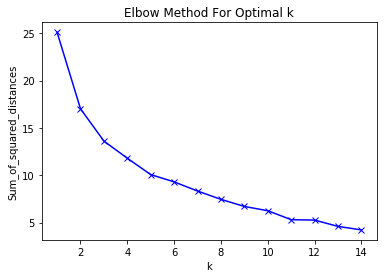

In [50]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

With all the data we are going to play and test some models to see how good are them for the clustering of the districts, we want similars districts in how the people live in. 

In [51]:
#Clustering K-means
from sklearn.preprocessing import StandardScaler
X = df_mergedc.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.33910566e+00,  1.12355325e+00,  6.39561920e-01,
        -2.30144704e+00,  6.03229078e-01,  3.81416645e-01,
         2.56018971e+00,  6.11146132e-01, -6.81154741e-01,
         5.01989036e-01,  5.08257838e+00,  3.07429079e+00,
         2.51641096e+00],
       [-1.25443048e+00, -4.08104379e-01, -6.99597084e-01,
        -1.71882801e-01, -1.22069266e+00,  1.51375782e+00,
        -3.15638101e-01, -5.01527599e-01,  3.46524478e-01,
        -2.86126507e-01, -4.79010718e-01, -4.35918646e-01,
        -1.24690321e+00],
       [ 1.36319720e+00, -1.31820439e+00, -7.80805914e-01,
         4.80057042e-01, -5.82625586e-01, -2.03663547e-01,
         9.74422100e-02, -1.16783385e+00,  7.11351248e-01,
        -1.02498483e+00, -5.05766525e-01, -4.26686579e-01,
         1.16776303e+00],
       [-1.60091080e-02, -6.43423569e-01, -5.63590122e-01,
         4.52728390e-01, -1.17329528e-01, -4.62106806e-02,
         2.49917616e-01, -9.14239767e-01, -3.82784778e-01,
        -7.29441499e-01,  4.86755387e

In [73]:
clusterNum = 6
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 5 5 1 5 1 5 4 1 1 5 5 4 3 2 5 5 1 1 4 5 4 3 5 1 5 4 5 5 1 5 2 1 1]


In [74]:
df_mergedd["Clus_km"] = labels
df_mergedd.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,cut,comuna_x,edad,sexo,cine,ing_mon_cb,cise_no,cise_emp,cise_prp,cise_prv,...,km2,idh,lat_y,lng_y,poblacion_n,poblacion_f,migrantes,densidad_y,areasv,Clus_km
0,13101,Santiago,39.763341,0.503480,5.368910,563218.018561,0.438515,0.032483,0.113689,0.352668,...,23.2,0.807,-33.4417,-70.6541,404495,1166405.5,26.368682,213.391892,0.833972,0
1,13102,Cerrillos,40.220264,0.440529,4.621145,251685.475771,0.519824,0.004405,0.140969,0.273128,...,21.0,0.743,-33.4970,-70.7112,80832,33708.9,4.372031,53.351638,0.670448,5
2,13103,Cerro Navia,34.276423,0.504065,4.176829,232793.623984,0.544715,0.014228,0.099593,0.284553,...,11.0,0.683,-33.4267,-70.7434,132622,28259.7,4.429883,156.038733,0.411703,5
3,13104,Conchalí,38.948307,0.470588,4.506261,283325.180036,0.543672,0.021390,0.103387,0.288770,...,10.7,0.707,-33.3862,-70.6727,126955,141179.7,7.145051,135.174991,0.465554,1
4,13105,El Bosque,37.297048,0.479705,4.258780,236292.942804,0.581181,0.007380,0.099631,0.267528,...,14.2,0.711,-33.5638,-70.6714,162505,92288.0,2.040553,128.060553,0.326461,5


In [75]:
df_mergedd.groupby('Clus_km').mean()

,cut,edad,sexo,cine,ing_mon_cb,cise_no,cise_emp,cise_prp,cise_prv,cise_pbl,cise_dom,km2,idh,lat_y,lng_y,poblacion_n,poblacion_f,migrantes,densidad_y,areasv
Clus_km,,,,,,,,,,,,,,,,,,,,
0,13101.000000,39.763341,0.503480,5.368910,5.632180e+05,0.438515,0.032483,0.113689,0.352668,0.053364,0.009281,23.200000,0.807000,-33.441700,-70.654100,404495.000000,1.166405e+06,26.368682,213.391892,0.833972
1,13152.300000,39.117343,0.473930,4.793662,3.402797e+05,0.529201,0.018331,0.099319,0.291662,0.047876,0.013610,56.530000,0.776100,-33.496630,-70.661470,255292.400000,1.036226e+05,5.475650,98.806730,0.444231
2,13123.500000,37.992771,0.442898,5.559493,9.329497e+05,0.490836,0.055107,0.060483,0.279762,0.034820,0.078992,526.150000,0.930500,-33.342800,-70.472300,95608.500000,6.957900e+04,10.387552,38.425851,0.606503
3,13118.500000,40.506005,0.427942,5.930467,1.033134e+06,0.486300,0.060876,0.099556,0.280933,0.049989,0.022346,56.650000,0.922000,-33.418400,-70.593500,218458.500000,4.313470e+05,10.278131,104.501715,0.865374
4,13118.000000,39.381681,0.468914,5.154417,5.111258e+05,0.498973,0.024846,0.098826,0.291592,0.066654,0.019109,23.380000,0.778400,-33.448900,-70.586220,160151.000000,1.302240e+05,12.101791,108.495475,0.737641
5,13116.571429,38.057276,0.477441,4.416824,2.597838e+05,0.551248,0.015478,0.116565,0.266752,0.031496,0.018460,29.021429,0.706214,-33.481121,-70.685671,123544.642857,4.338917e+04,4.182892,113.361352,0.490901


In [76]:
df_mergedd[['comuna_x', 'Clus_km', 'lat_y', 'lng_y']].sort_values('Clus_km').head(35)

,comuna_x,Clus_km,lat_y,lng_y
0,Santiago,0,-33.4417,-70.6541
29,San Miguel,1,-33.5017,-70.6489
24,Quilicura,1,-33.3551,-70.7278
18,Maipú,1,-33.5213,-70.7572
17,Macul,1,-33.4920,-70.5968
32,Puente Alto,1,-33.6079,-70.5778
9,La Florida,1,-33.5225,-70.5952
8,La Cisterna,1,-33.5380,-70.6612
33,San Bernardo,1,-33.5913,-70.7020
5,Estación Central,1,-33.4503,-70.6751


With the clustering made of the district, we label each district with the clustering and start to get the data from Foursquare. With a radius of 1km for each district center we get all the commerces we found. We divided it to the population, so we know how many type of commerce we have for 10.000 of the district.

In [77]:
df_finalf = df_mergedd[['comuna_x', 'Clus_km', 'lat_y', 'lng_y', 'poblacion_n']]
df_finalf.head()

,comuna_x,Clus_km,lat_y,lng_y,poblacion_n
0,Santiago,0,-33.4417,-70.6541,404495
1,Cerrillos,5,-33.4970,-70.7112,80832
2,Cerro Navia,5,-33.4267,-70.7434,132622
3,Conchalí,1,-33.3862,-70.6727,126955
4,El Bosque,5,-33.5638,-70.6714,162505


In [62]:
df_finalf.dtypes

comuna_x        object
Clus_km          int32
lat_y          float64
lng_y          float64
poblacion_n      int64
dtype: object

Foursquare 

In [63]:
# The code was removed by Watson Studio for sharing.

In [78]:
df_finalf.loc[0, 'comuna_x']


'Santiago'

In [79]:
df_final0 = df_finalf[df_finalf.Clus_km.eq(0)]
df_final1 = df_finalf[df_finalf.Clus_km.eq(1)]
df_final2 = df_finalf[df_finalf.Clus_km.eq(2)]
df_final3 = df_finalf[df_finalf.Clus_km.eq(3)]
df_final4 = df_finalf[df_finalf.Clus_km.eq(4)]
df_final5 = df_finalf[df_finalf.Clus_km.eq(5)]

In [80]:
df_final5.head()

,comuna_x,Clus_km,lat_y,lng_y,poblacion_n
1,Cerrillos,5,-33.4970,-70.7112,80832
2,Cerro Navia,5,-33.4267,-70.7434,132622
4,El Bosque,5,-33.5638,-70.6714,162505
6,Huechuraba,5,-33.3665,-70.6315,98671
10,La Granja,5,-33.5373,-70.6188,116571


In [82]:
LIMIT = 1000 # limit of number of venues returned by Foursquare API


radius = 2000 # define radius
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [83]:
santiago1_venues = getNearbyVenues(names=df_final1['comuna_x'], latitudes=df_final1['lat_y'],longitudes=df_final1['lng_y'])

Conchalí
Estación Central
La Cisterna
La Florida
Macul
Maipú
Quilicura
San Miguel
Puente Alto
San Bernardo


In [84]:
print(santiago1_venues.shape)
santiago1_venues.head()

(702, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Conchalí,-33.3862,-70.6727,El Gordo,-33.380691,-70.682709,Restaurant
1,Conchalí,-33.3862,-70.6727,La Pierna,-33.392688,-70.676679,Sandwich Place
2,Conchalí,-33.3862,-70.6727,Restaurant Sing Hwa,-33.389565,-70.675896,Chinese Restaurant
3,Conchalí,-33.3862,-70.6727,Gimnasio BodyPalace Gym,-33.386052,-70.679963,Gym
4,Conchalí,-33.3862,-70.6727,Bar Rebelión,-33.395033,-70.672267,Pub


In [85]:
santiago1_venues.groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Conchalí,26,26,26,26,26,26
Estación Central,100,100,100,100,100,100
La Cisterna,60,60,60,60,60,60
La Florida,100,100,100,100,100,100
Macul,100,100,100,100,100,100
Maipú,60,60,60,60,60,60
Puente Alto,64,64,64,64,64,64
Quilicura,51,51,51,51,51,51
San Bernardo,58,58,58,58,58,58


In [86]:
# one hot encoding
santiago1_onehot = pd.get_dummies(santiago1_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
santiago1_onehot['Neighborhood'] = santiago1_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [santiago1_onehot.columns[-1]] + list(santiago1_onehot.columns[:-1])
santiago1_onehot = santiago1_onehot[fixed_columns]

santiago1_onehot.head()

,Yoga Studio,Accessories Store,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Athletics & Sports,...,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Track Stadium,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Winery
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
santiago1_grouped = santiago1_onehot.groupby('Neighborhood').sum().reset_index()
santiago1_grouped

,Neighborhood,Yoga Studio,Accessories Store,American Restaurant,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,...,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Track Stadium,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Winery
0,Conchalí,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Estación Central,1,0,1,0,1,0,1,0,3,...,1,1,0,0,0,0,1,0,0,0
2,La Cisterna,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,La Florida,1,1,0,2,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4,Macul,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,Maipú,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
6,Puente Alto,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Quilicura,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
8,San Bernardo,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,San Miguel,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [88]:
num_top_venues = 10

for hood in santiago1_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = santiago1_grouped[santiago1_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Conchalí----
                  venue  freq
0              Pharmacy   3.0
1                  Park   3.0
2    Chinese Restaurant   2.0
3  Fast Food Restaurant   2.0
4          Cupcake Shop   1.0
5            Restaurant   1.0
6                   Pub   1.0
7                 Plaza   1.0
8     Convenience Store   1.0
9                Winery   1.0


----Estación Central----
                 venue  freq
0           Restaurant   5.0
1     Sushi Restaurant   5.0
2                  Pub   4.0
3  Peruvian Restaurant   4.0
4       Sandwich Place   4.0
5          Coffee Shop   3.0
6                  Bar   3.0
7     Asian Restaurant   3.0
8    Martial Arts Dojo   3.0
9                Plaza   3.0


----La Cisterna----
                venue  freq
0  Chinese Restaurant   8.0
1    Sushi Restaurant   6.0
2         Pizza Place   5.0
3            Pharmacy   4.0
4                 Bar   3.0
5                Park   3.0
6        Burger Joint   2.0
7                 Gym   2.0
8         Supermarket   2.0
9  Se

In [95]:
santiago2_venues = getNearbyVenues(names=df_final2['comuna_x'], latitudes=df_final2['lat_y'],longitudes=df_final2['lng_y'])
santiago2_venues.groupby('Neighborhood').count()


Lo Barnechea
Vitacura


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Lo Barnechea,1,1,1,1,1,1
Vitacura,100,100,100,100,100,100


In [97]:
# one hot encoding
santiago2_onehot = pd.get_dummies(santiago2_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
santiago2_onehot['Neighborhood'] = santiago2_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [santiago2_onehot.columns[-1]] + list(santiago2_onehot.columns[:-1])
santiago2_onehot = santiago2_onehot[fixed_columns]

santiago2_onehot.head()

,Neighborhood,Airport,Argentinian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Beer Bar,Boutique,Café,Chocolate Shop,...,Supermarket,Sushi Restaurant,Tea Room,Theater,Theme Park Ride / Attraction,Toy / Game Store,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Yoga Studio
0,Lo Barnechea,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Vitacura,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Vitacura,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Vitacura,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Vitacura,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
santiago2_grouped = santiago2_onehot.groupby('Neighborhood').sum().reset_index()
santiago2_grouped

,Neighborhood,Airport,Argentinian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Beer Bar,Boutique,Café,Chocolate Shop,...,Supermarket,Sushi Restaurant,Tea Room,Theater,Theme Park Ride / Attraction,Toy / Game Store,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Yoga Studio
0,Lo Barnechea,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Vitacura,1,1,2,1,4,1,1,5,2,...,1,1,1,1,1,1,1,1,1,1


In [99]:
num_top_venues = 10

for hood in santiago2_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = santiago2_grouped[santiago2_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Lo Barnechea----
                             venue  freq
0                         Mountain   1.0
1                          Airport   0.0
2                   Sandwich Place   0.0
3                Mobile Phone Shop   0.0
4  Molecular Gastronomy Restaurant   0.0
5                  Motorcycle Shop   0.0
6                      Music Venue   0.0
7            Outdoors & Recreation   0.0
8                Paella Restaurant   0.0
9                             Park   0.0


----Vitacura----
                  venue  freq
0                  Café   5.0
1  Gym / Fitness Center   4.0
2                  Park   4.0
3                Bakery   4.0
4           Coffee Shop   4.0
5            Restaurant   4.0
6                   Spa   3.0
7    Italian Restaurant   3.0
8                 Hotel   3.0
9        Sandwich Place   3.0




In [100]:
santiago3_venues = getNearbyVenues(names=df_final3['comuna_x'], latitudes=df_final3['lat_y'],longitudes=df_final3['lng_y'])
santiago3_venues.groupby('Neighborhood').count()

Las Condes
Providencia


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Las Condes,100,100,100,100,100,100
Providencia,100,100,100,100,100,100


In [101]:
# one hot encoding
santiago3_onehot = pd.get_dummies(santiago3_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
santiago3_onehot['Neighborhood'] = santiago3_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [santiago3_onehot.columns[-1]] + list(santiago3_onehot.columns[:-1])
santiago3_onehot = santiago3_onehot[fixed_columns]

santiago3_onehot.head()

,Neighborhood,Art Gallery,Asian Restaurant,Athletics & Sports,Bakery,Bar,Beer Bar,Bistro,Bookstore,Boutique,...,Steakhouse,Sushi Restaurant,Tea Room,Temple,Theater,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Las Condes,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Las Condes,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Las Condes,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Las Condes,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Las Condes,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
santiago3_grouped = santiago3_onehot.groupby('Neighborhood').sum().reset_index()
santiago3_grouped

,Neighborhood,Art Gallery,Asian Restaurant,Athletics & Sports,Bakery,Bar,Beer Bar,Bistro,Bookstore,Boutique,...,Steakhouse,Sushi Restaurant,Tea Room,Temple,Theater,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Las Condes,0,0,1,5,1,0,1,0,1,...,1,1,2,1,2,1,0,1,1,2
1,Providencia,1,1,1,2,0,1,2,2,1,...,1,2,1,1,1,0,1,0,1,1


In [103]:
num_top_venues = 10

for hood in santiago3_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = santiago3_grouped[santiago3_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Las Condes----
                  venue  freq
0                 Hotel  10.0
1           Coffee Shop   6.0
2                Bakery   5.0
3                 Plaza   5.0
4        Ice Cream Shop   4.0
5                  Park   4.0
6        Chocolate Shop   3.0
7  Gym / Fitness Center   3.0
8   Peruvian Restaurant   3.0
9         Deli / Bodega   3.0


----Providencia----
                venue  freq
0               Hotel  11.0
1   French Restaurant   5.0
2         Coffee Shop   5.0
3      Ice Cream Shop   4.0
4                Park   4.0
5        Burger Joint   3.0
6               Plaza   3.0
7  Italian Restaurant   2.0
8      Clothing Store   2.0
9    Sculpture Garden   2.0




In [104]:
santiago4_venues = getNearbyVenues(names=df_final4['comuna_x'], latitudes=df_final4['lat_y'],longitudes=df_final4['lng_y'])
santiago4_venues.groupby('Neighborhood').count()

Independencia
La Reina
Ñuñoa
Peñalolén
Recoleta


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Independencia,100,100,100,100,100,100
La Reina,74,74,74,74,74,74
Peñalolén,9,9,9,9,9,9
Recoleta,100,100,100,100,100,100
Ñuñoa,100,100,100,100,100,100


In [105]:
# one hot encoding
santiago4_onehot = pd.get_dummies(santiago4_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
santiago4_onehot['Neighborhood'] = santiago4_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [santiago4_onehot.columns[-1]] + list(santiago4_onehot.columns[:-1])
santiago4_onehot = santiago4_onehot[fixed_columns]

santiago4_onehot.head()

,Neighborhood,Accessories Store,Airport,American Restaurant,Art Gallery,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,...,Theater,Theme Park,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Water Park,Wine Bar,Yoga Studio,Zoo Exhibit
0,Independencia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Independencia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Independencia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Independencia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Independencia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
santiago4_grouped = santiago4_onehot.groupby('Neighborhood').sum().reset_index()
santiago4_grouped

,Neighborhood,Accessories Store,Airport,American Restaurant,Art Gallery,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,...,Theater,Theme Park,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Water Park,Wine Bar,Yoga Studio,Zoo Exhibit
0,Independencia,1,0,0,0,1,0,0,2,0,...,0,1,0,0,0,0,1,0,0,0
1,La Reina,0,3,1,0,0,0,2,0,1,...,0,0,1,0,0,0,0,0,0,1
2,Peñalolén,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Recoleta,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,1,0,0,2,0
4,Ñuñoa,0,0,0,0,0,1,0,0,0,...,4,0,0,0,1,0,0,1,1,0


In [108]:
num_top_venues = 10

for hood in santiago4_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = santiago4_grouped[santiago4_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Independencia----
                       venue  freq
0        Peruvian Restaurant   7.0
1                 Restaurant   6.0
2             Farmers Market   6.0
3         Chinese Restaurant   5.0
4                       Park   4.0
5           Sushi Restaurant   4.0
6             Sandwich Place   4.0
7                     Bakery   3.0
8  South American Restaurant   3.0
9             Soccer Stadium   2.0


----La Reina----
                  venue  freq
0      Sushi Restaurant   4.0
1                  Park   3.0
2                 Plaza   3.0
3               Airport   3.0
4  Gym / Fitness Center   2.0
5           Pizza Place   2.0
6          Soccer Field   2.0
7        Farmers Market   2.0
8        Scenic Lookout   2.0
9    Chinese Restaurant   2.0


----Peñalolén----
                 venue  freq
0        Garden Center   3.0
1          Bus Station   1.0
2                 Park   1.0
3         Soccer Field   1.0
4          Pizza Place   1.0
5                Trail   1.0
6        Hot Dog Join

In [109]:
santiago5_venues = getNearbyVenues(names=df_final5['comuna_x'], latitudes=df_final5['lat_y'],longitudes=df_final5['lng_y'])
santiago5_venues.groupby('Neighborhood').count()

Cerrillos
Cerro Navia
El Bosque
Huechuraba
La Granja
La Pintana
Lo Espejo
Lo Prado
Pedro Aguirre Cerda
Pudahuel
Quinta Normal
Renca
San Joaquín
San Ramón


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Cerrillos,23,23,23,23,23,23
Cerro Navia,15,15,15,15,15,15
El Bosque,23,23,23,23,23,23
Huechuraba,11,11,11,11,11,11
La Granja,16,16,16,16,16,16
La Pintana,10,10,10,10,10,10
Lo Espejo,21,21,21,21,21,21
Lo Prado,56,56,56,56,56,56
Pedro Aguirre Cerda,54,54,54,54,54,54


In [110]:
# one hot encoding
santiago5_onehot = pd.get_dummies(santiago5_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
santiago5_onehot['Neighborhood'] = santiago5_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [santiago5_onehot.columns[-1]] + list(santiago5_onehot.columns[:-1])
santiago5_onehot = santiago5_onehot[fixed_columns]

santiago5_onehot.head()

,Women's Store,Airport,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,Bar,Basketball Court,...,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Theater,Toy / Game Store,Train Station,Water Park,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
santiago5_grouped = santiago5_onehot.groupby('Neighborhood').sum().reset_index()
santiago5_grouped

,Neighborhood,Women's Store,Airport,Art Gallery,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bakery,Bar,...,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Theater,Toy / Game Store,Train Station,Water Park,Wings Joint
0,Cerrillos,0,1,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,Cerro Navia,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,El Bosque,0,0,1,1,0,0,0,0,1,...,0,0,2,2,0,0,0,0,0,0
3,Huechuraba,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,La Granja,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,La Pintana,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,Lo Espejo,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,Lo Prado,0,0,0,1,0,0,0,6,1,...,0,0,0,3,0,0,0,0,0,1
8,Pedro Aguirre Cerda,0,0,1,1,0,0,0,3,2,...,1,1,0,5,0,0,0,1,0,0
9,Pudahuel,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
num_top_venues = 10

for hood in santiago5_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = santiago5_grouped[santiago5_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Cerrillos----
                  venue  freq
0           Bus Station   2.0
1        Soccer Stadium   1.0
2     Food & Drink Shop   1.0
3                 Plaza   1.0
4  Fast Food Restaurant   1.0
5                  Pool   1.0
6   Rental Car Location   1.0
7            Restaurant   1.0
8                  Park   1.0
9    Chinese Restaurant   1.0


----Cerro Navia----
                 venue  freq
0                Plaza   4.0
1          Bus Station   2.0
2  Japanese Restaurant   1.0
3         Burger Joint   1.0
4          Pizza Place   1.0
5             Pharmacy   1.0
6  Fried Chicken Joint   1.0
7   Chinese Restaurant   1.0
8          Flea Market   1.0
9     Asian Restaurant   1.0


----El Bosque----
              venue  freq
0       Flea Market   2.0
1  Sushi Restaurant   2.0
2       Supermarket   2.0
3            Market   1.0
4    Breakfast Spot   1.0
5              Pool   1.0
6              Food   1.0
7       Pizza Place   1.0
8          Pharmacy   1.0
9  Department Store   1.0


---